# US Accidents Exploratory Data Analysis




**STEP 1**
Loading the Dataset from kaggle

In [7]:
pip install opendatasets --upgrade --quiet

In [1]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [2]:
data_filename = '/content/us-accidents/US_Accidents_March23.csv'

**Step 2** : Data preprocessing and cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values
4. Understanding the data
5. you can also load data if its large for your device by converting it into chunks and loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [4]:
import pandas as pd

# Path to the downloaded CSV file
data_filename = 'us-accidents/US_Accidents_March23.csv'  # Adjust the path as necessary

# Define the chunk size
chunk_size = 100000  # Adjust based on your memory limitations

# Initialize an empty list to hold the processed chunks
chunk_list = []

# Iterate over the CSV file in chunks
for chunk in pd.read_csv(data_filename, chunksize=chunk_size):
    # Example processing: Check if 'existing_column' exists before using it
    if 'existing_column' in chunk.columns:
        chunk['new_column'] = chunk['existing_column'] * 2  # Replace 'existing_column' with actual column name
    else:
        chunk['new_column'] = 0  # Example fallback if column is missing

    # Append the processed chunk to the list
    chunk_list.append(chunk)

# Concatenate all the processed chunks into a single DataFrame
df = pd.concat(chunk_list, ignore_index=True)


In [ ]:
df = pd.read_csv(data_filename)

In [6]:
df.head(15)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.shape

(7728394, 46)

In [ ]:
df.columns


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [ ]:
df['City'].value_counts()

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
                  ...  
Rapid River           1
Cat Spring            1
Glenwood City         1
Downing               1
Marfa                 1
Name: count, Length: 13678, dtype: int64

* Some Cities have reported only 1 accident so the data needs to be updated and investigation should be made


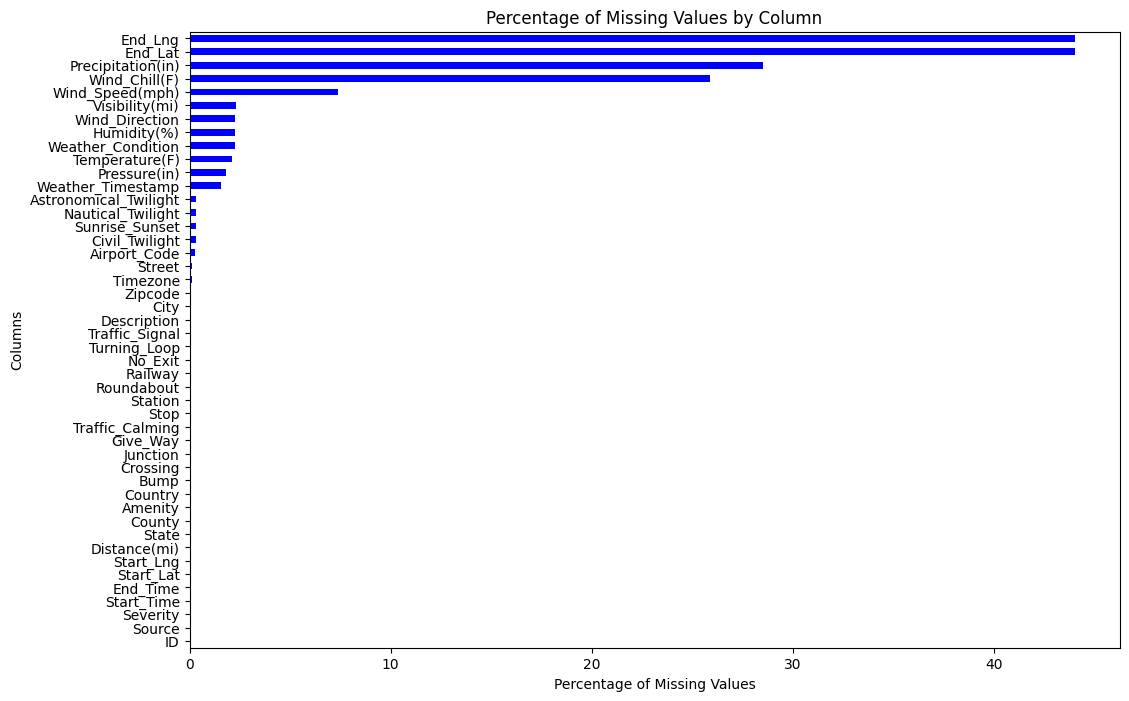

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition   

In [ ]:
# Sort columns by missing percentage in ascending order
missing_percentages = missing_percentages.sort_values()

# Create a bar plot
plt.figure(figsize=(12, 8))
missing_percentages.plot(kind='barh', color='blue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')
plt.show()
df.isnull().sum() / len(df) * 100

In [7]:
columns_to_drop = ['ID', 'Precipitation(in)','End_Lat', 'End_Lng']
df.drop(columns=columns_to_drop, inplace=True)


In [8]:
# Calculate the median of 'Wind_Chill(F)'
median_windchill = df['Wind_Chill(F)'].median()

# Fill missing values with the median
df['Wind_Chill(F)'].fillna(median_windchill, inplace=True)


In [ ]:
df['Wind_Chill(F)'].isnull().sum()

0

I have droped the columns which i dont need and wont impact in analysis


*   Treated the missing values of Windchill column with median



#EDA
 Columns we'll analyze:

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Conditio

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

<Axes: ylabel='City'>

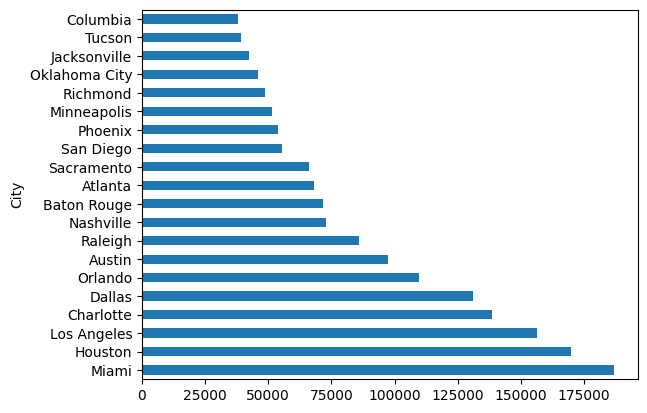

In [ ]:
cities_by_accident[:20].plot(kind='barh')

The top 20 cities which have high accidents recorded

the top 5 are : miami,houston,los angeles,Charlotte,Dallas



In [9]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

# Drop rows with NaT in Start_Time
df = df.dropna(subset=['Start_Time'])

# Extract time components
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['Start_Time'].dt.month


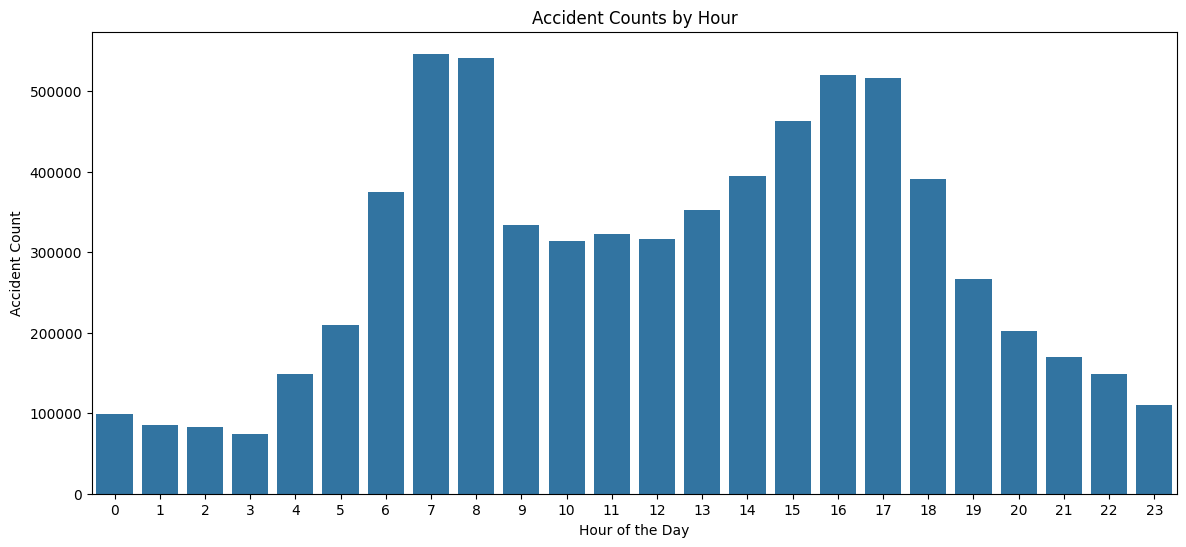

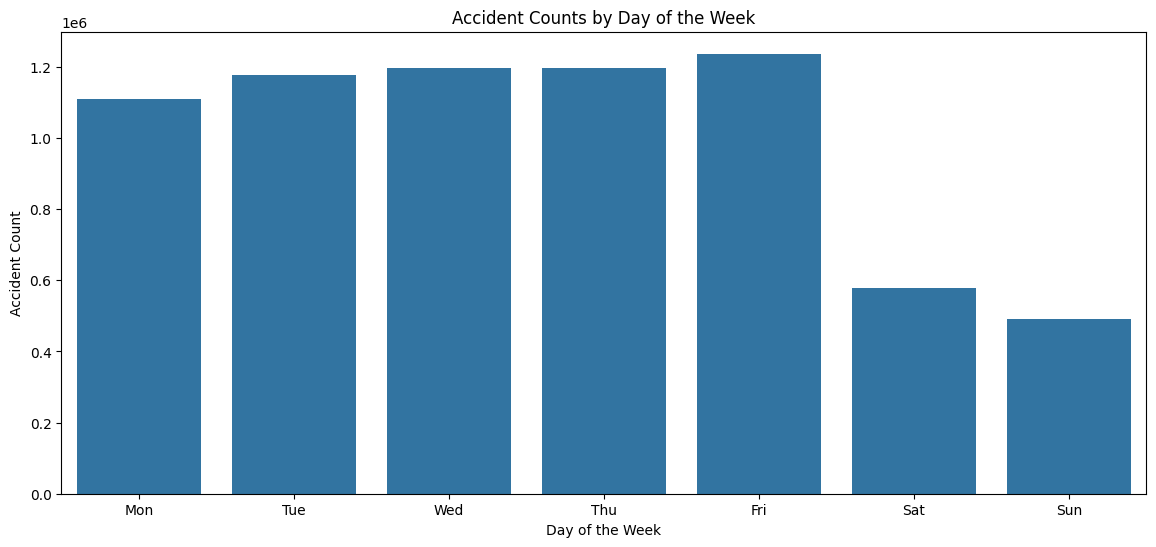

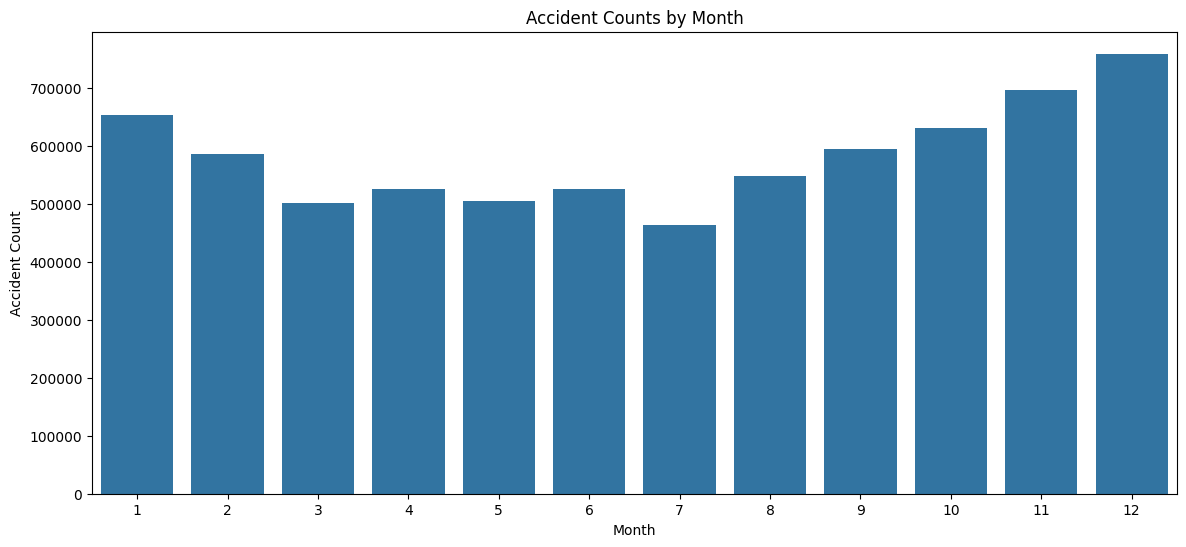

In [ ]:
# Step 1: Visualize Accident Counts by Hour, Day of the Week, and Month

plt.figure(figsize=(14, 6))
sns.countplot(x='Hour', data=df)
plt.title('Accident Counts by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Accident Count')
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(x='DayOfWeek', data=df)
plt.title('Accident Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(x='Month', data=df)
plt.title('Accident Counts by Month')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.show()

* The major time of accidents are in morning and evenning
* the days are monday to friday it is also because most of the people come out for school,work, etc
* the most accidents happened in dec

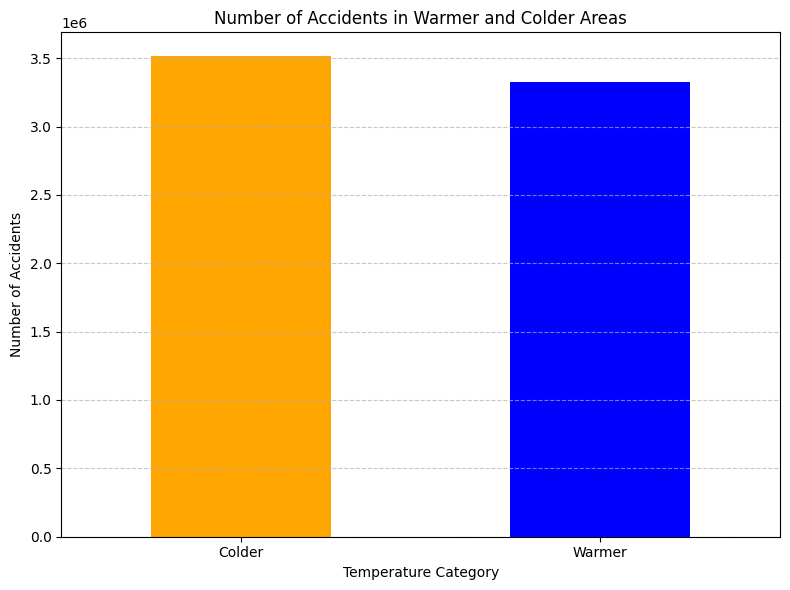

Temperature_Category
Colder    3513153
Warmer    3325987
Name: count, dtype: int64


In [16]:
df = df.dropna(subset=['Temperature(F)'])

# Calculate the median temperature
median_temperature = df['Temperature(F)'].median()

# Create a new column to categorize temperature
df['Temperature_Category'] = df['Temperature(F)'].apply(lambda x: 'Warmer' if x > median_temperature else 'Colder')

# Count the number of accidents in each temperature category
temperature_counts = df['Temperature_Category'].value_counts()

# Plotting the results
plt.figure(figsize=(8, 6))
temperature_counts.plot(kind='bar', color=['orange', 'blue'])
plt.title('Number of Accidents in Warmer and Colder Areas')
plt.xlabel('Temperature Category')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print out the results
print(temperature_counts)

In [ ]:
# Plotting the relationship between top 5 cities and traffic signals
plt.figure(figsize=(10, 6))
sns.countplot(x='City', hue='Traffic_Signal', data=df_top_cities, order=top_cities)
plt.title('Accidents Involving Traffic Signals in Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Accident Count')
plt.legend(title='Traffic Signal', loc='upper right')
plt.tight_layout()
plt.show()


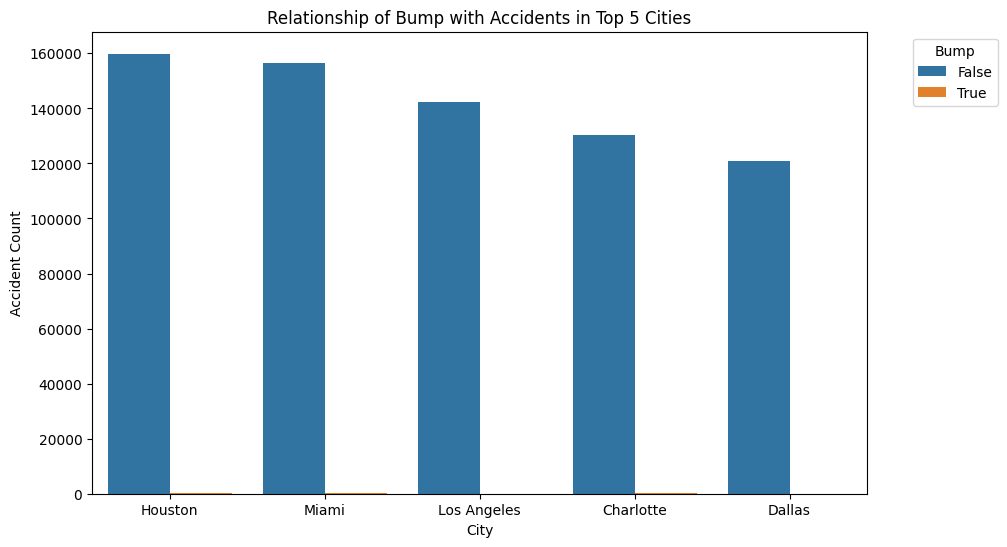

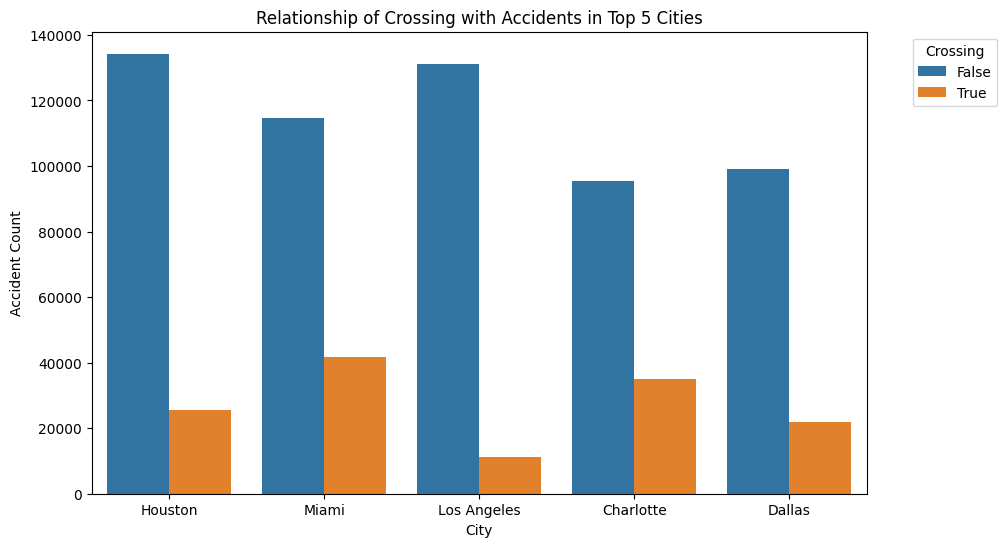

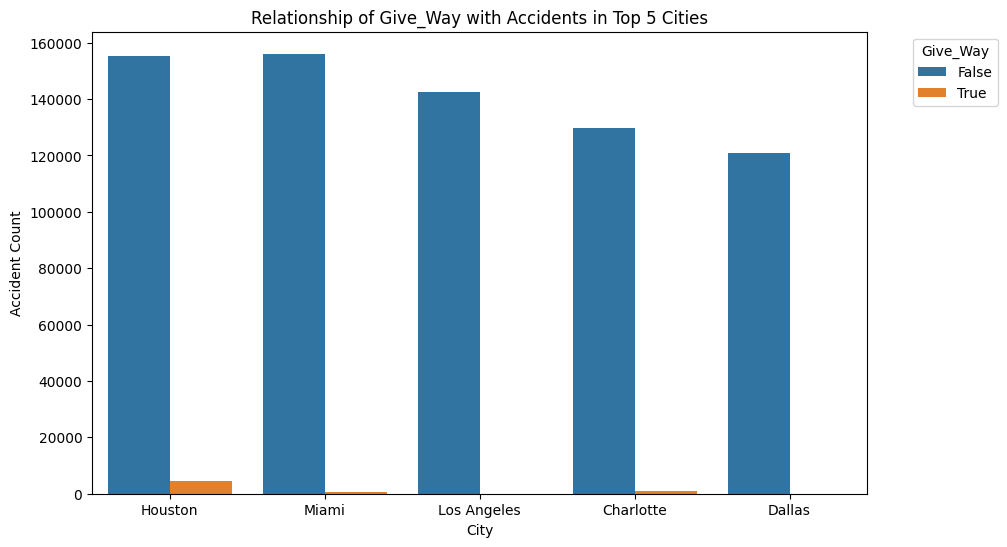

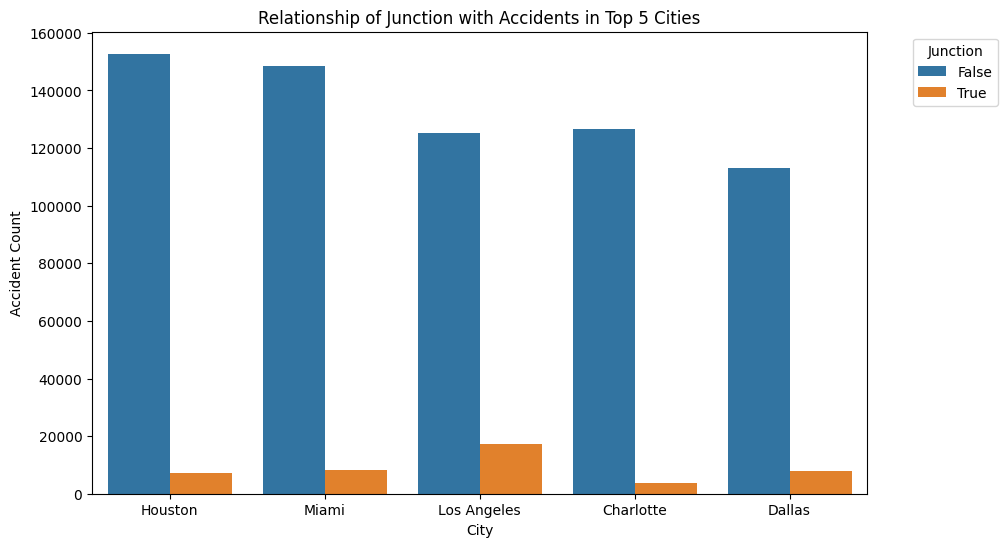

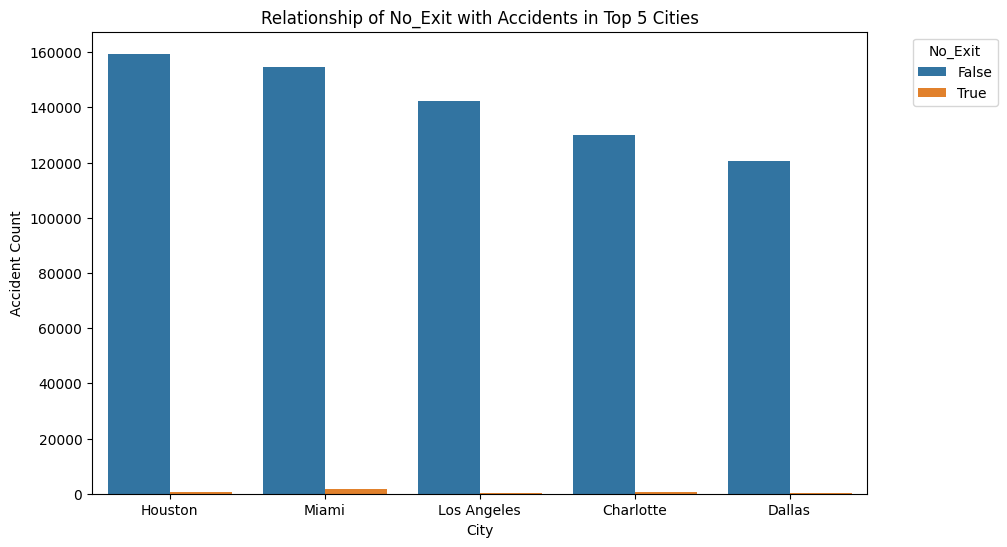

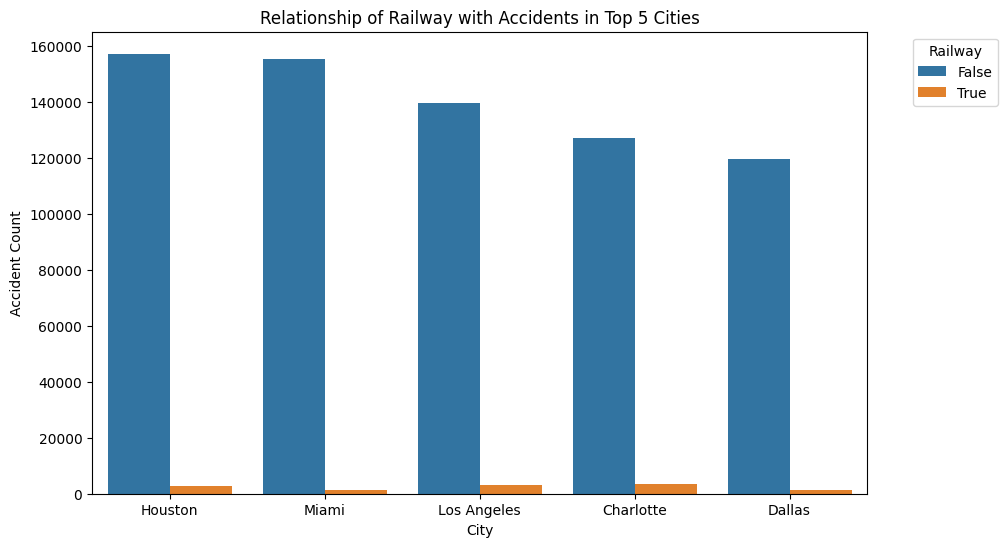

In [ ]:
# Step 1: Identify the top 5 cities with the most accidents
top_cities = df['City'].value_counts().head(5).index
top_cities_df = df[df['City'].isin(top_cities)]

# Features to investigate
features = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway']

# Plotting the relationship of these features with accidents in the top 5 cities
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=top_cities_df, x='City', hue=feature, order=top_cities)
    plt.title(f'Relationship of {feature} with Accidents in Top 5 Cities')
    plt.xlabel('City')
    plt.ylabel('Accident Count')
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


<ipython-input-27-17b926dbdefb>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)


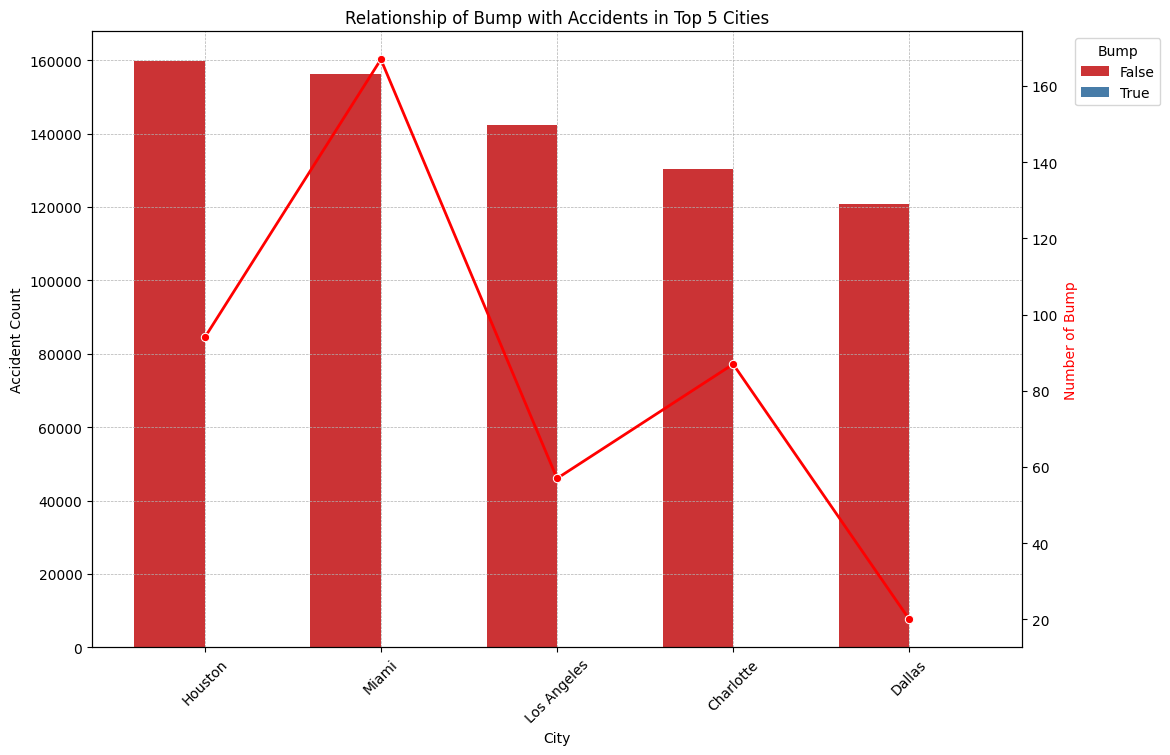

<ipython-input-27-17b926dbdefb>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)


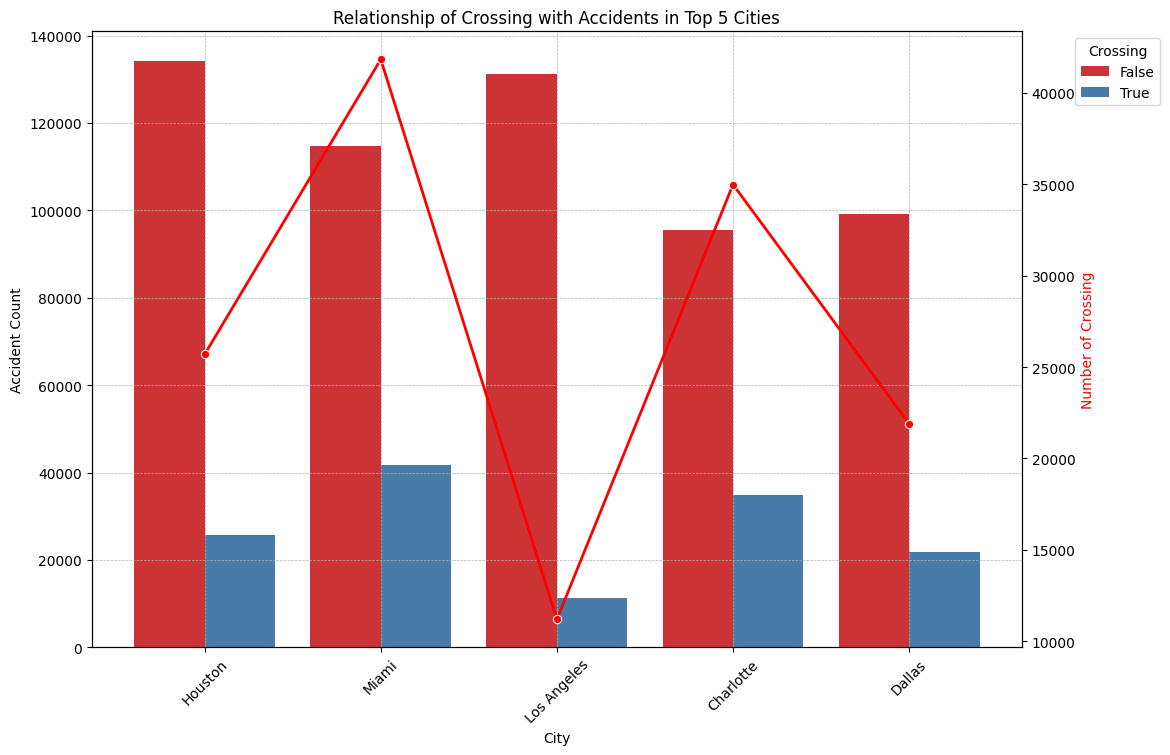

<ipython-input-27-17b926dbdefb>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)


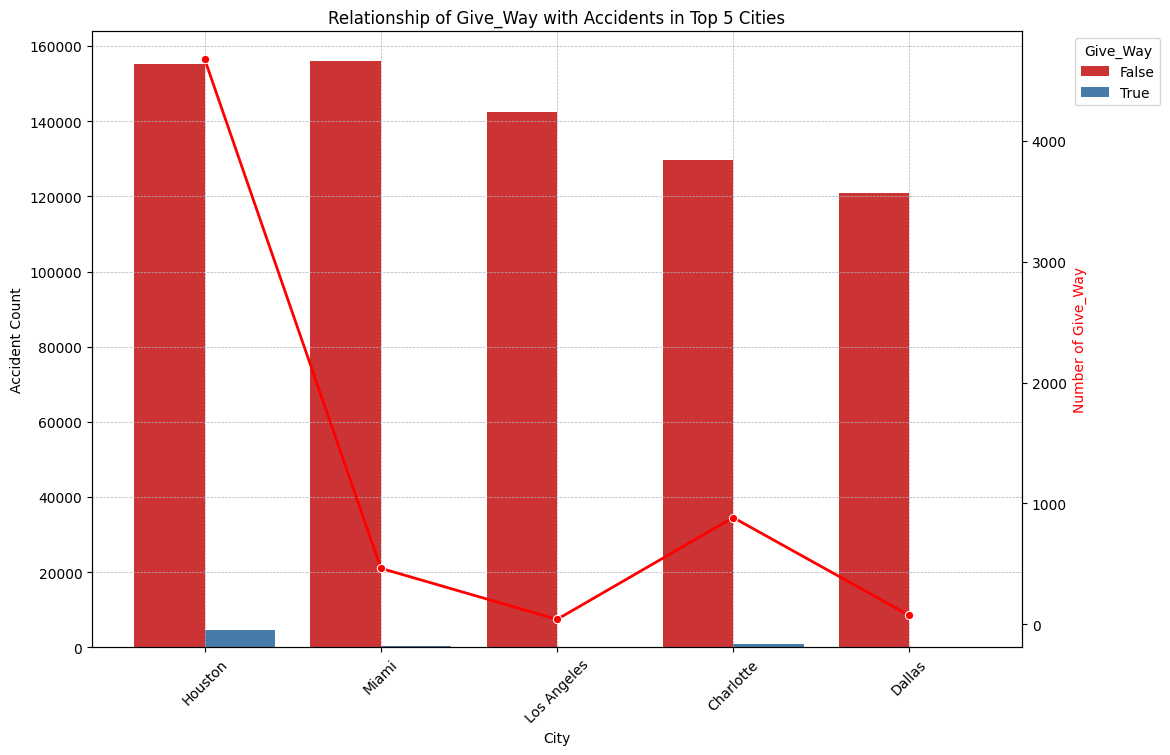

<ipython-input-27-17b926dbdefb>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)


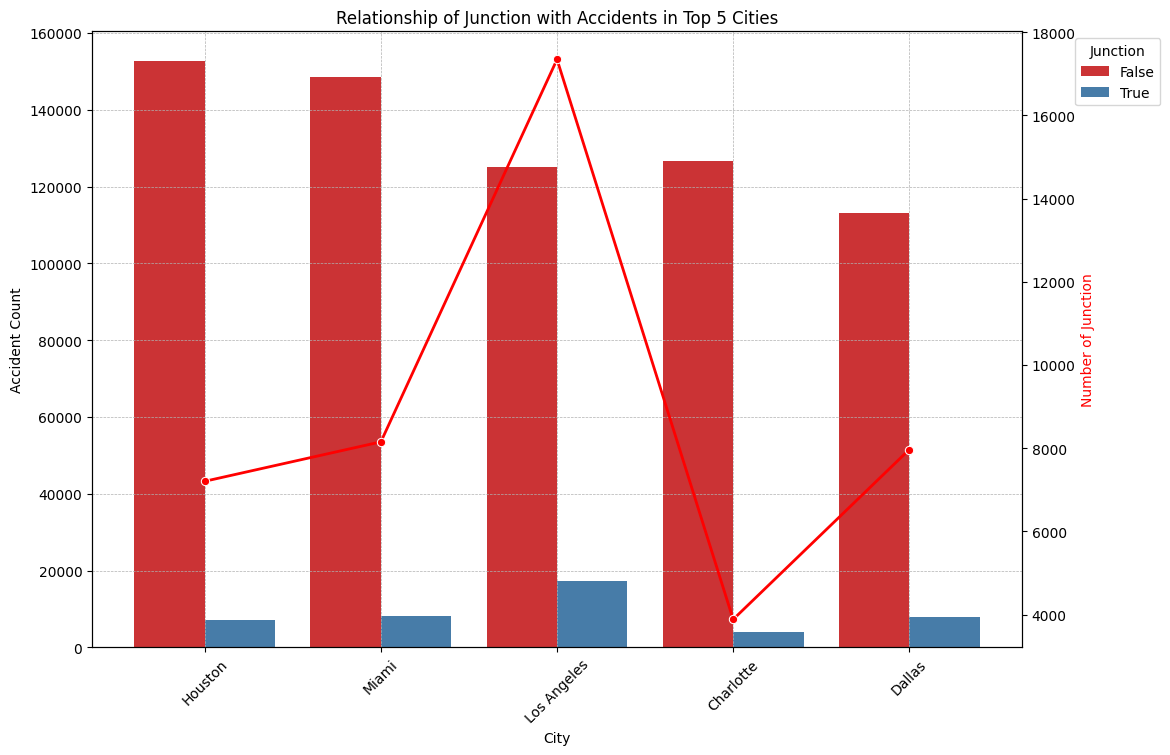

<ipython-input-27-17b926dbdefb>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)


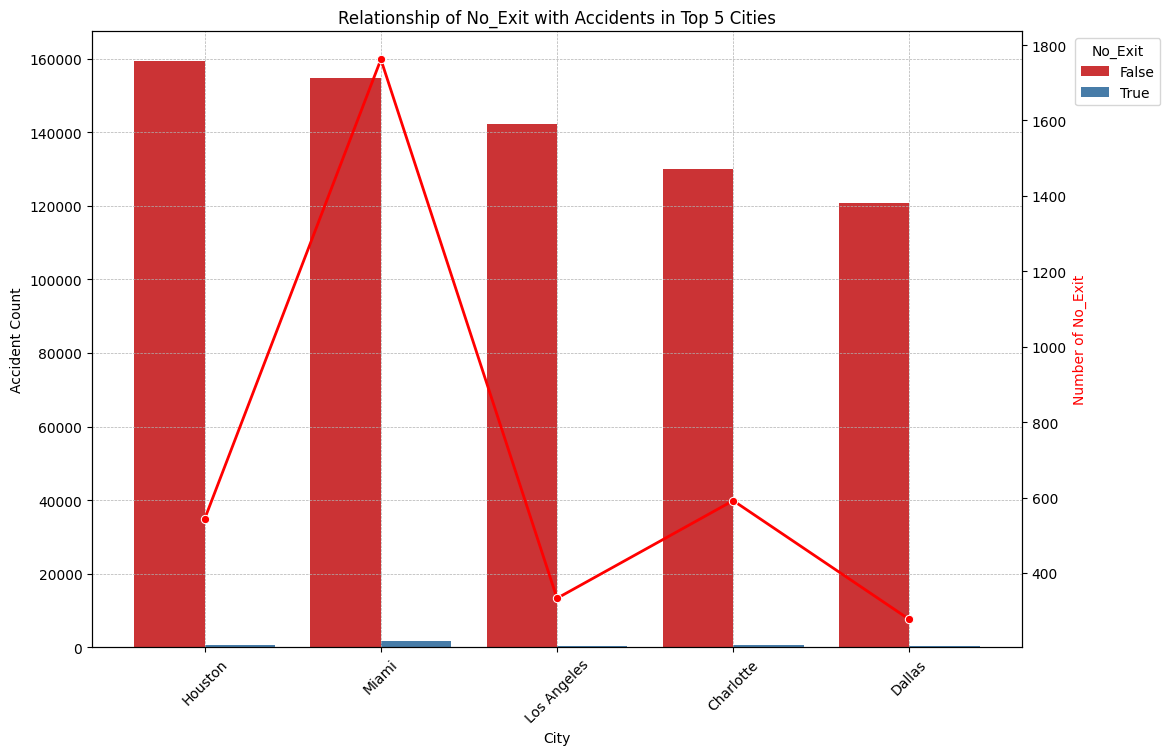

<ipython-input-27-17b926dbdefb>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)


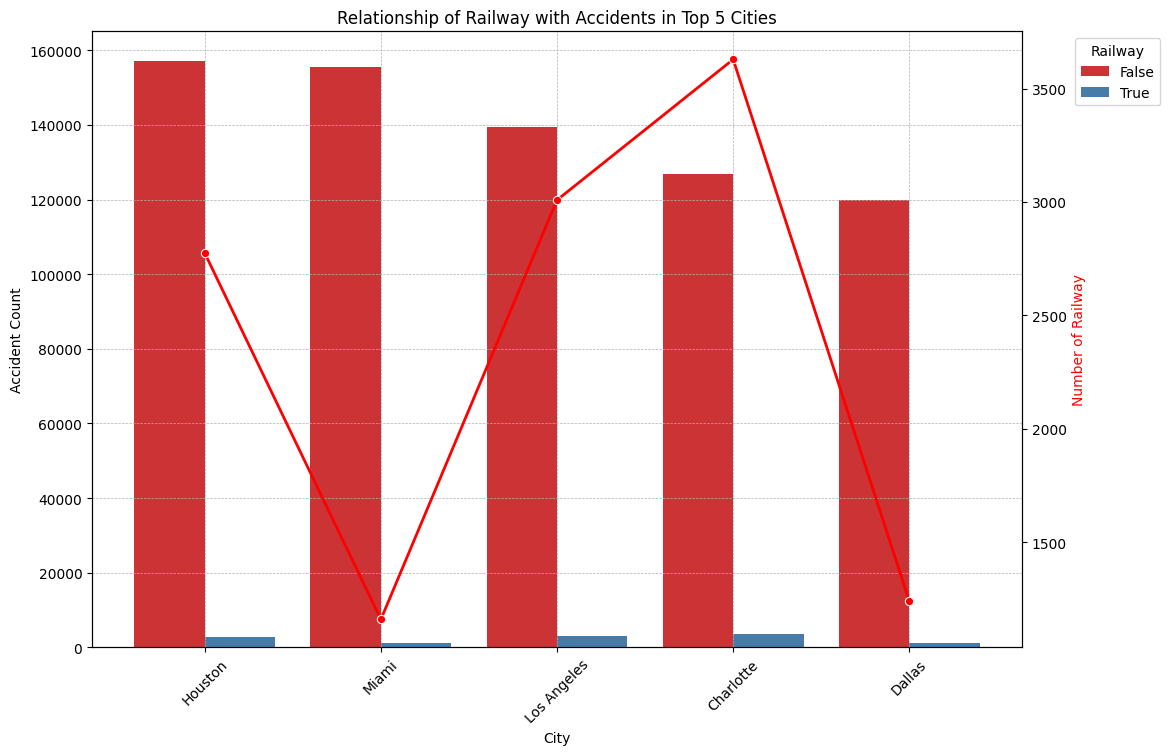

In [ ]:
top_cities = df['City'].value_counts().head(5).index
top_cities_df = df[df['City'].isin(top_cities)]

# Features to investigate
features = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway']

# Create the combined line and bar chart
for feature in features:
    plt.figure(figsize=(12, 8))

    # Create a bar plot
    bar_plot = sns.countplot(data=top_cities_df, x='City', hue=feature, order=top_cities, palette='Set1')
    bar_plot.set_title(f'Relationship of {feature} with Accidents in Top 5 Cities')
    bar_plot.set_xlabel('City')
    bar_plot.set_ylabel('Accident Count')
    bar_plot.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Create a secondary y-axis for the line plot
    ax2 = bar_plot.twinx()

    # Calculate the sum of the feature occurrences
    feature_sum = top_cities_df.groupby('City')[feature].sum().reindex(top_cities)

    # Create a line plot on the secondary y-axis
    line_plot = sns.lineplot(data=feature_sum, ax=ax2, color='red', marker='o', linewidth=2)
    ax2.set_ylabel(f'Number of {feature}', color='red')

    # Enhancements
    bar_plot.grid(True, which='both', linestyle='--', linewidth=0.5)
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

    plt.show()


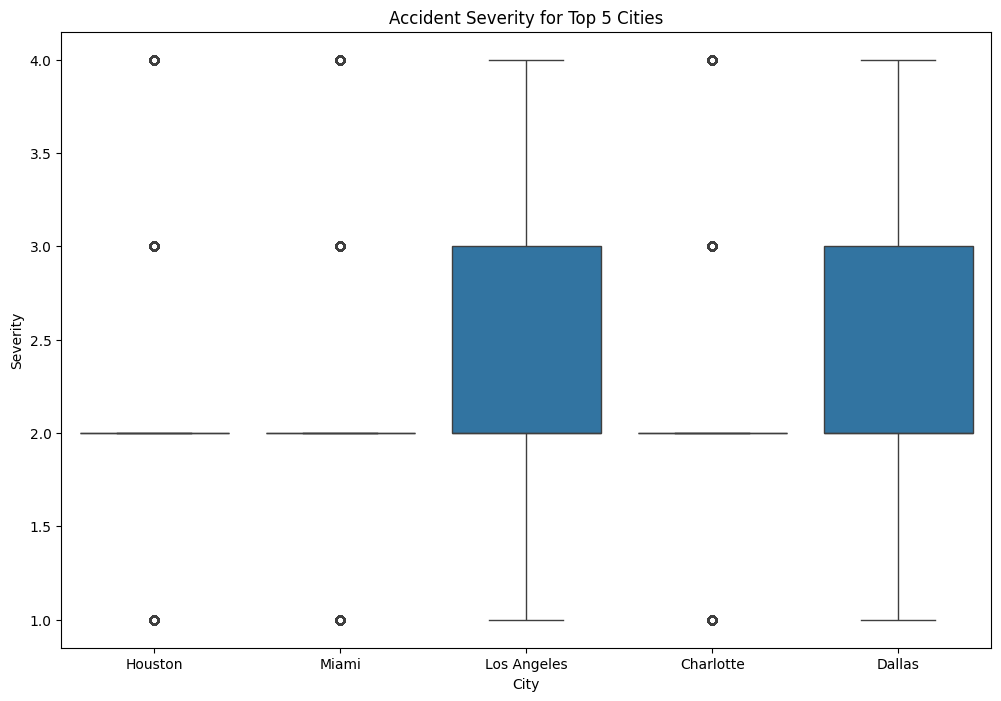

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Severity', data=df_top_cities, order=top_cities)
plt.title('Accident Severity for Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Severity')
plt.show()


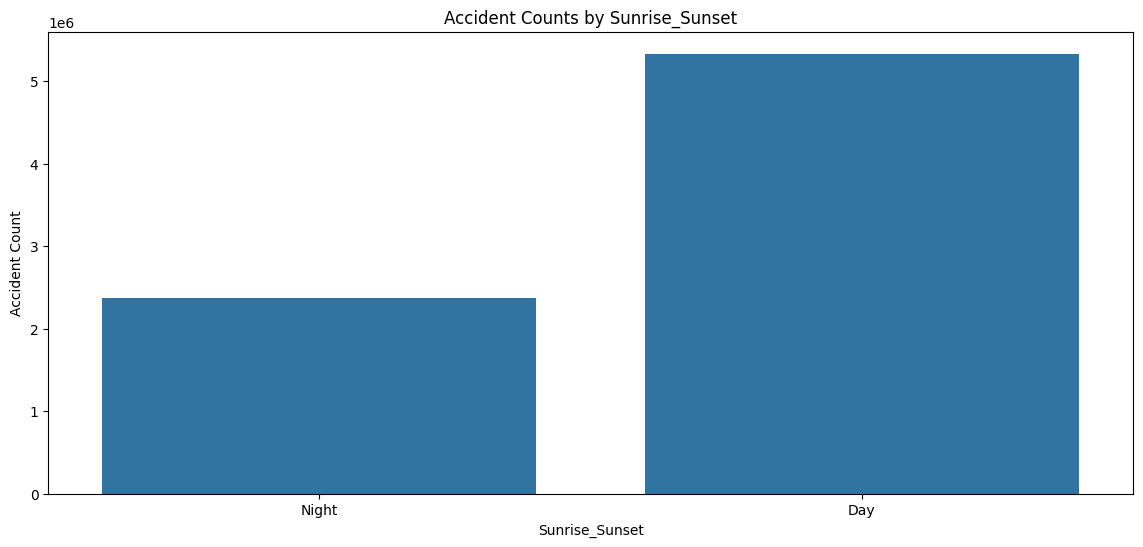

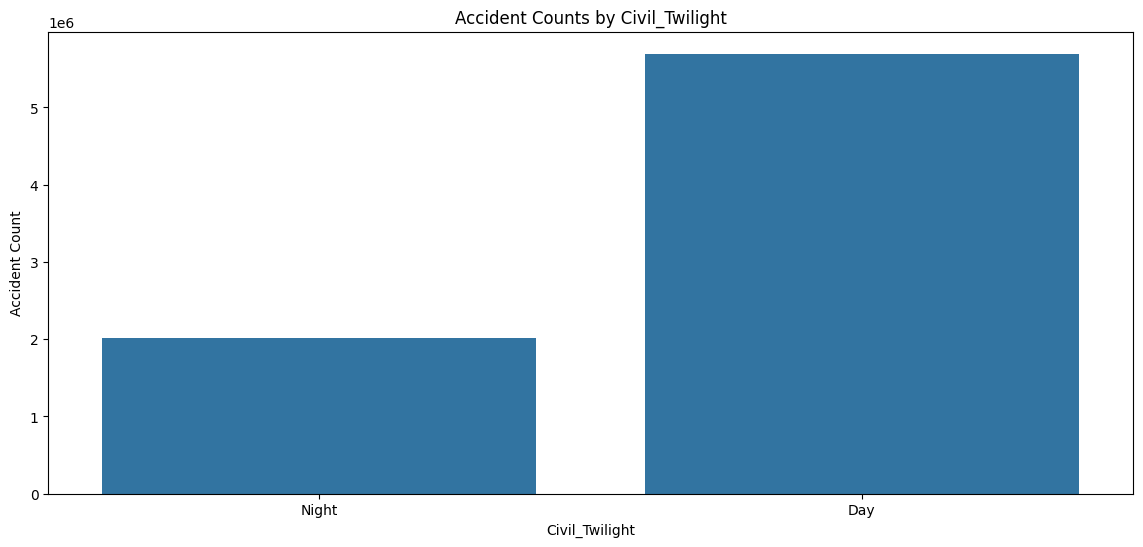

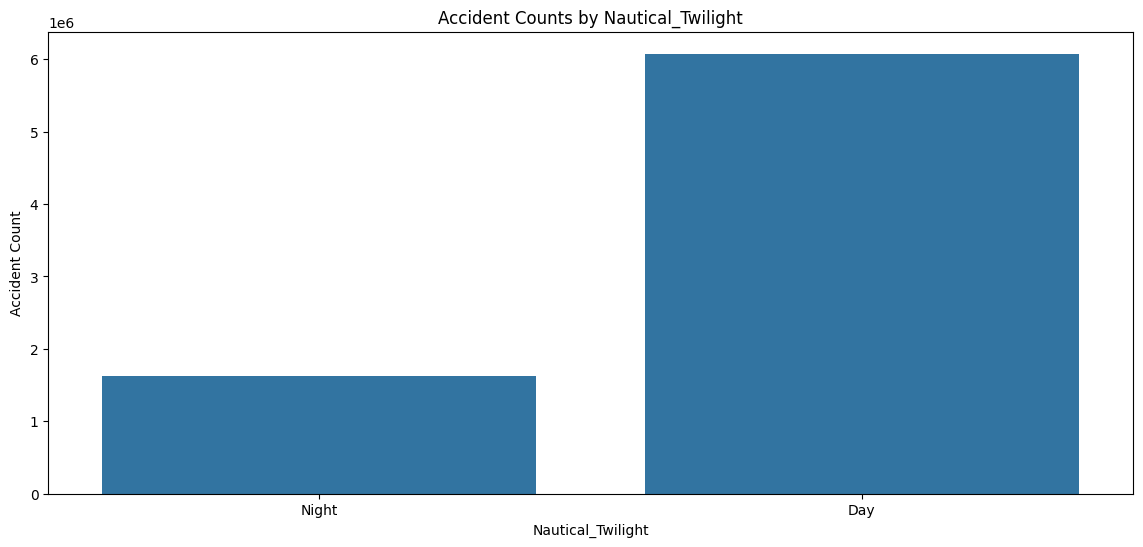

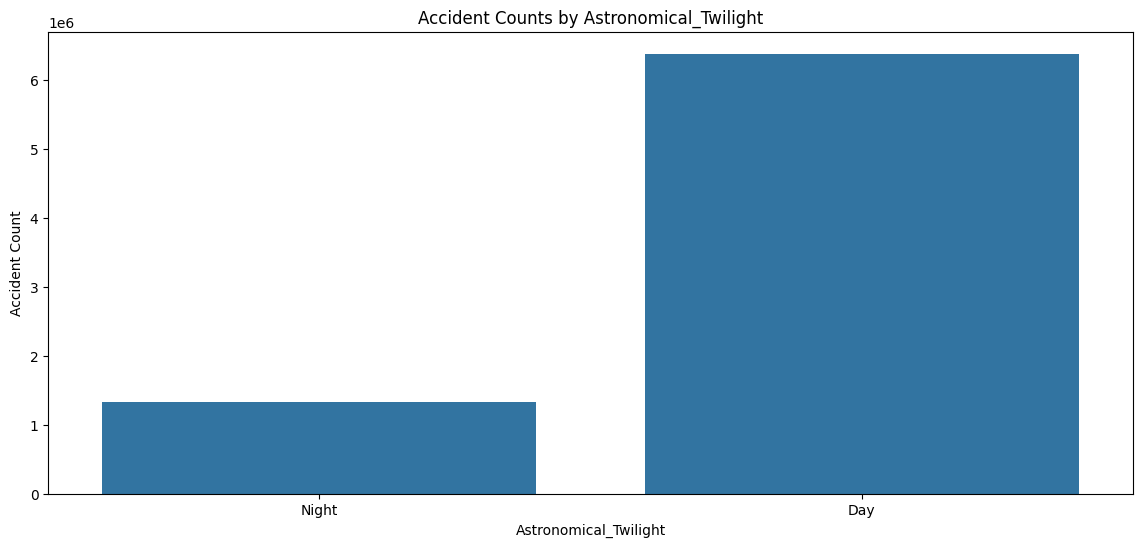

In [ ]:
# Step 3: Visualize Accident Counts by Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight

plt.figure(figsize=(10, 6))
sns.countplot(x='Sunrise_Sunset', data=df)
plt.title('Accident Counts by Sunrise_Sunset')
plt.xlabel('Sunrise_Sunset')
plt.ylabel('Accident Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Civil_Twilight', data=df)
plt.title('Accident Counts by Civil_Twilight')
plt.xlabel('Civil_Twilight')
plt.ylabel('Accident Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Nautical_Twilight', data=df)
plt.title('Accident Counts by Nautical_Twilight')
plt.xlabel('Nautical_Twilight')
plt.ylabel('Accident Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Astronomical_Twilight', data=df)
plt.title('Accident Counts by Astronomical_Twilight')
plt.xlabel('Astronomical_Twilight')
plt.ylabel('Accident Count')
plt.show()

Serverity range in los Angeles And dallas are 2 to 3

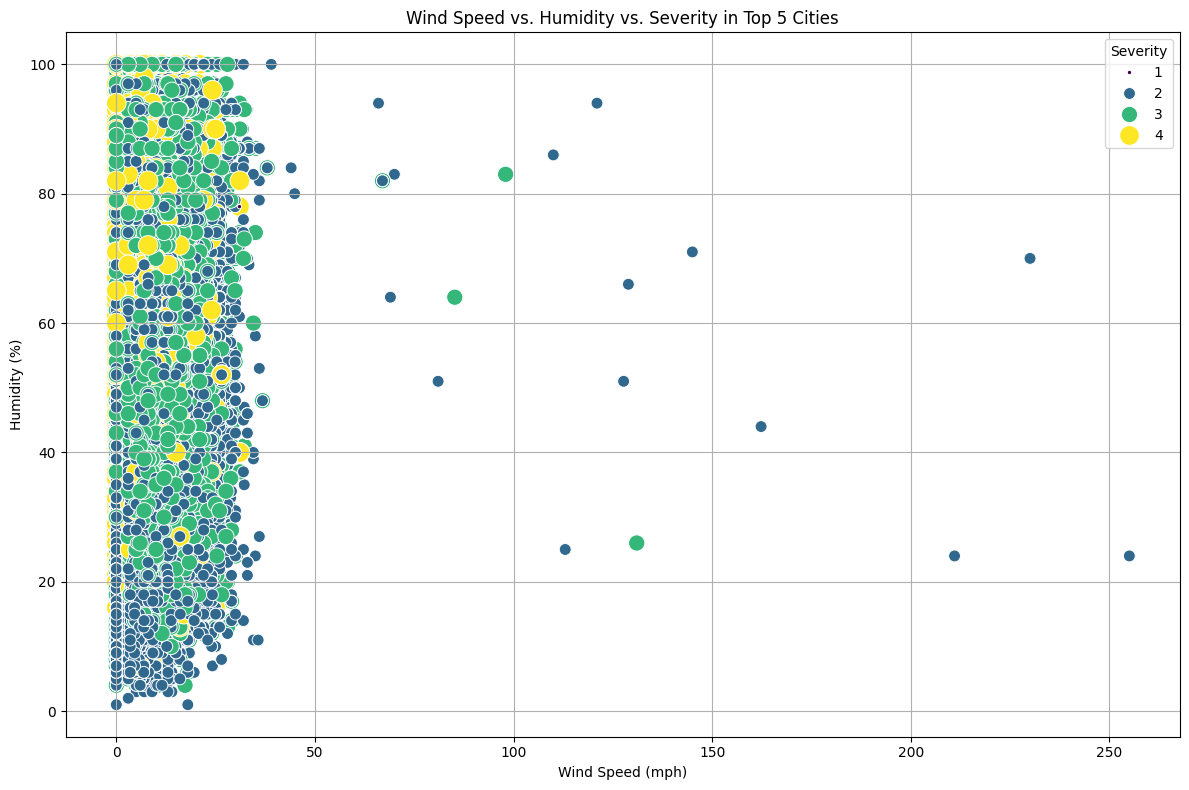

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame containing US accidents data

# Filter relevant columns and remove rows with missing values
df_filtered = df[['City', 'Wind_Speed(mph)', 'Humidity(%)', 'Severity']].dropna()

# Select top 5 cities for analysis
top_cities = ['Miami', 'Houston', 'Los Angeles', 'Charlotte', 'Dallas']
df_top_cities = df_filtered[df_filtered['City'].isin(top_cities)]

# Plotting the relationships
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Wind_Speed(mph)', y='Humidity(%)', hue='Severity', data=df_top_cities, palette='viridis', size='Severity', sizes=(10, 200))
plt.title('Wind Speed vs. Humidity vs. Severity in Top 5 Cities')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Humidity (%)')
plt.legend(title='Severity', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-23-6e640ca884e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_cities['Start_Time'] = pd.to_datetime(df_top_cities['Start_Time'])
<ipython-input-23-6e640ca884e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_cities['Hour_of_Day'] = df_top_cities['Start_Time'].dt.hour
<ipython-input-23-6e640ca884e4>:12: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handle

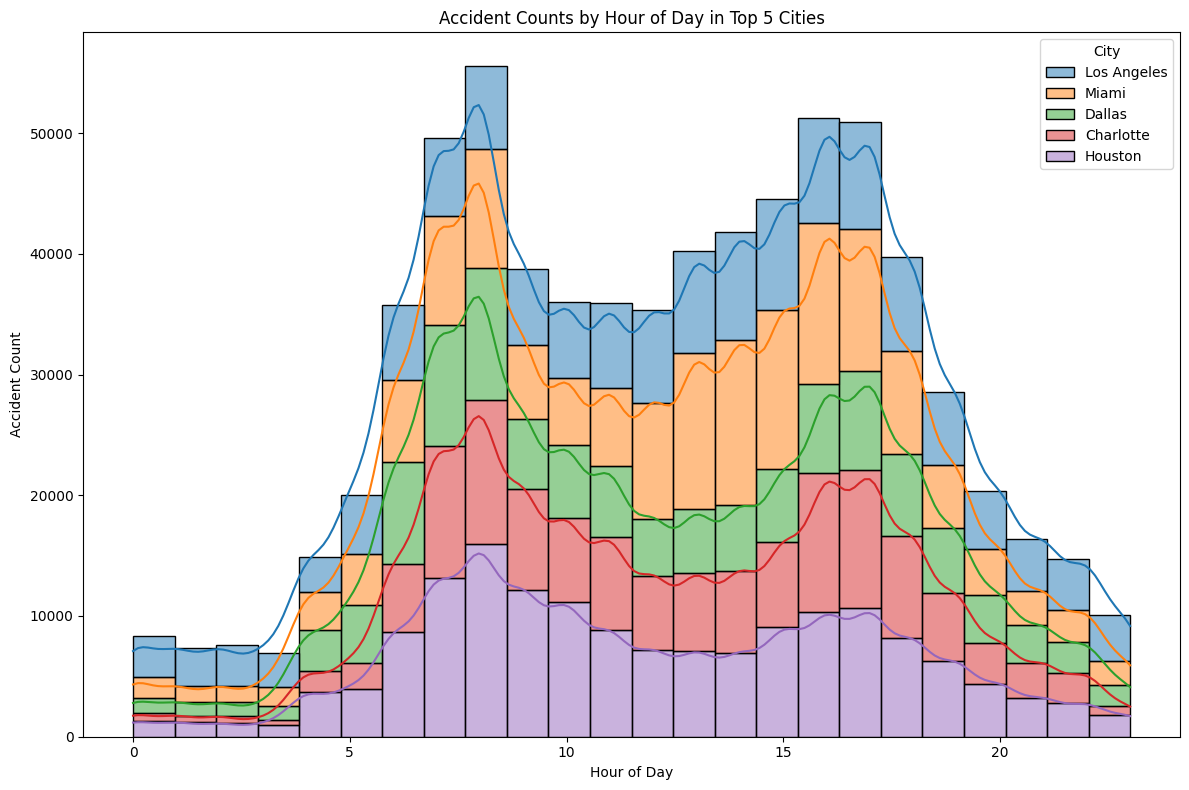

In [ ]:
# Ensure 'Start_Time' column is in datetime format and extract the hour
df_top_cities['Start_Time'] = pd.to_datetime(df_top_cities['Start_Time'])
df_top_cities['Hour_of_Day'] = df_top_cities['Start_Time'].dt.hour

plt.figure(figsize=(12, 8))
histplot = sns.histplot(data=df_top_cities, x='Hour_of_Day', hue='City', multiple='stack', bins=24, kde=True)
plt.title('Accident Counts by Hour of Day in Top 5 Cities')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')

# Manually create legend handles and labels
handles, labels = histplot.get_legend().legendHandles, [t.get_text() for t in histplot.get_legend().get_texts()]

# Remove the old legend
histplot.get_legend().remove()

# Create a new legend
plt.legend(handles=handles, labels=labels, title='City', loc='upper right')

plt.tight_layout()
plt.show()


Los Angeles have more accidents around 8 am and 4pm
and other trends of other cities is also shown with the help of line curve

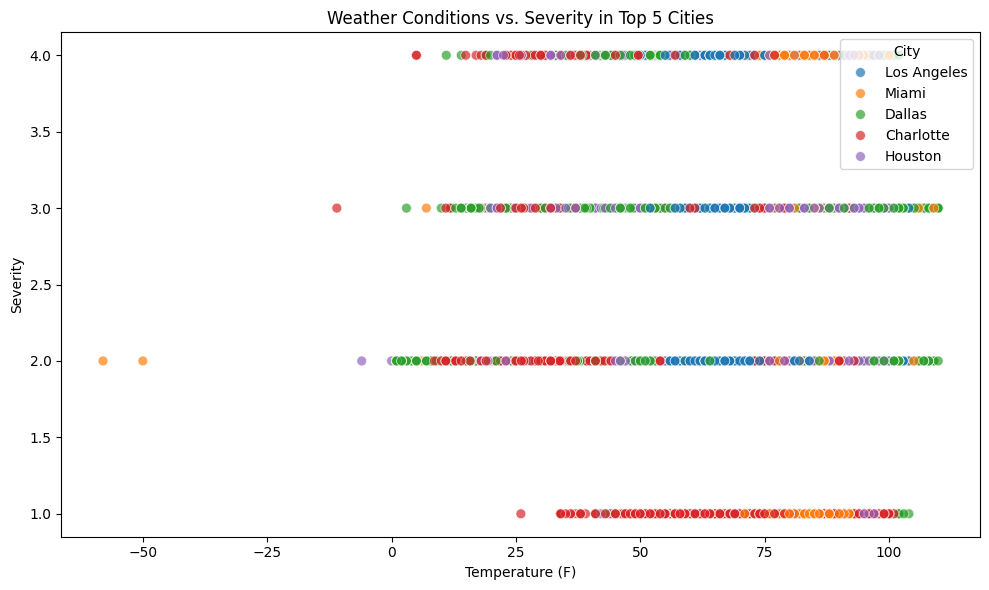

In [ ]:
plt.figure(figsize=(10, 6))

# Adjusting alpha to see overlapping points better
sns.scatterplot(x='Temperature(F)', y='Severity', hue='City', data=df_top_cities, alpha=0.7, s=50)

plt.title('Weather Conditions vs. Severity in Top 5 Cities')
plt.xlabel('Temperature (F)')
plt.ylabel('Severity')
plt.legend(title='City', loc='upper right')
plt.tight_layout()
plt.show()


According to this the severity in the accidents in top 5 cities is when the temperature is round 25 to 100 F as most accidents happened at that time
but severe accidents have been recorded in Miami more a range of 75 -100F

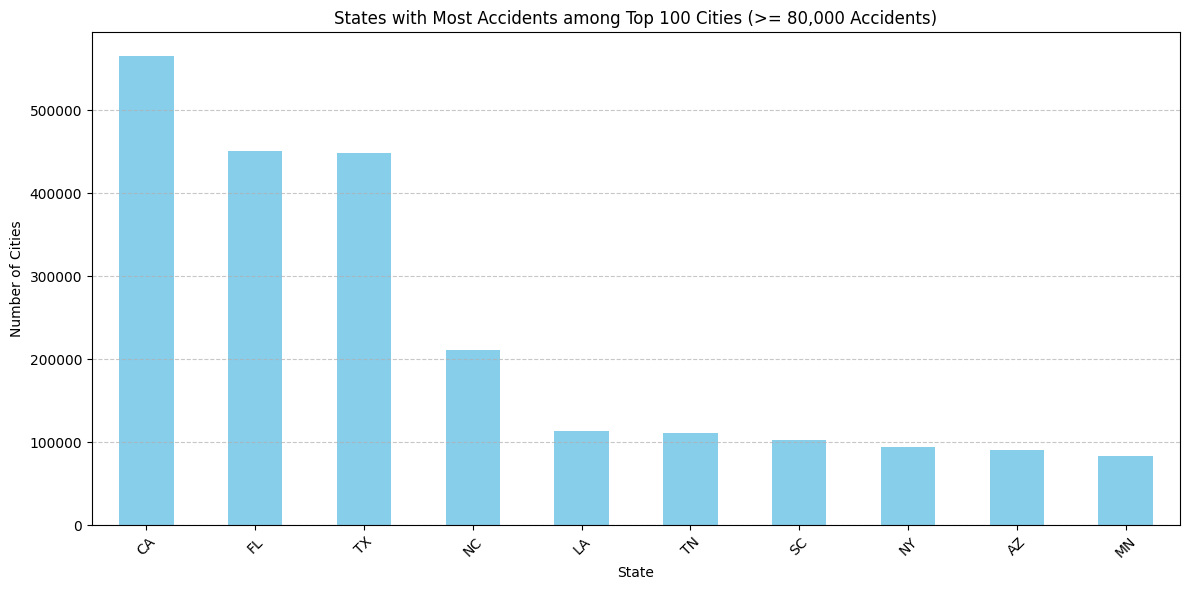

In [11]:
# Step 1: Get the top 100 cities with the highest number of accidents
top_100_cities = df['City'].value_counts().head(100).index

# Step 2: Count the frequency of each state among these top 100 cities
state_counts = df[df['City'].isin(top_100_cities)]['State'].value_counts()

# Step 3: Filter out states with fewer than 80,000 accidents
filtered_state_counts = state_counts[state_counts >= 80000]

# Step 4: Plotting the states
plt.figure(figsize=(12, 6))
filtered_state_counts.plot(kind='bar', color='skyblue')
plt.title('States with Most Accidents among Top 100 Cities (>= 80,000 Accidents)')
plt.xlabel('State')
plt.ylabel('Number of Cities')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


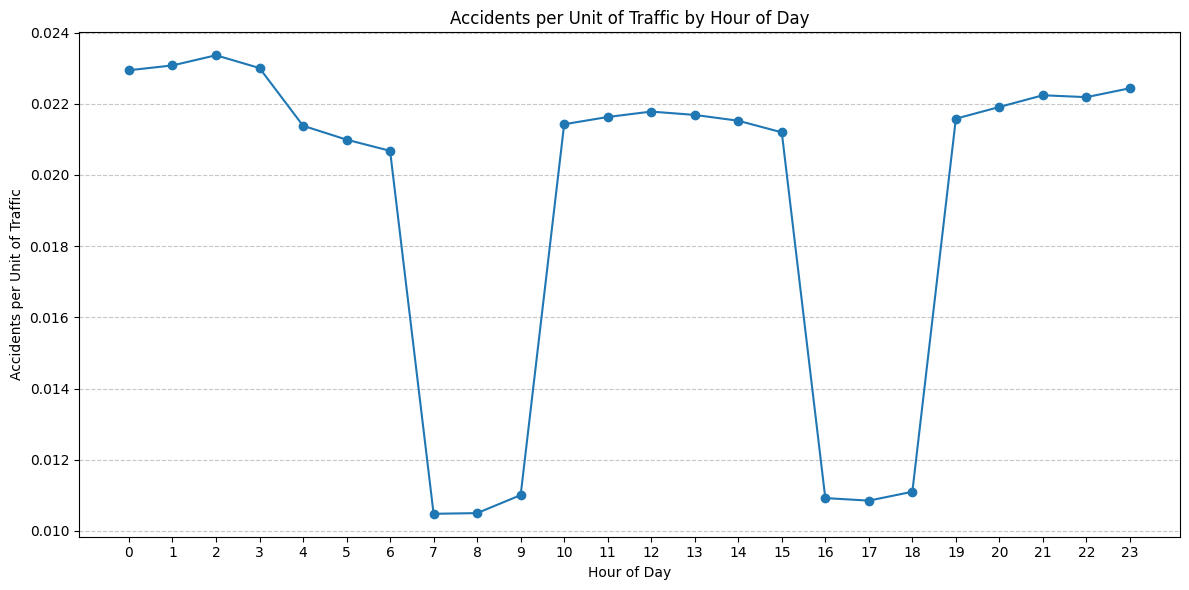

In [15]:
# Ensure 'Start_Time' column is in datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract time-related features if not already extracted
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
df['Month'] = df['Start_Time'].dt.month

# Proxy for traffic volume: Assign higher traffic volume to rush hours (7-9 AM, 4-6 PM on weekdays)
def estimate_traffic_volume(row):
    if row['DayOfWeek'] < 5:  # Weekdays
        if 7 <= row['Hour'] <= 9 or 16 <= row['Hour'] <= 18:
            return 100  # High traffic volume
        else:
            return 50  # Moderate traffic volume
    else:  # Weekends
        return 30  # Lower traffic volume

df['Traffic_Volume'] = df.apply(estimate_traffic_volume, axis=1)

# Group by hour of the day and calculate the total accidents and total estimated traffic volume
hourly_data = df.groupby('Hour').agg({
    'Start_Time': 'count',  # Count of accidents
    'Traffic_Volume': 'sum'  # Sum of estimated traffic volume
}).rename(columns={'Start_Time': 'Accidents'}).reset_index()

# Calculate accidents per unit of traffic
hourly_data['Accidents_per_Traffic_Unit'] = hourly_data['Accidents'] / hourly_data['Traffic_Volume']

# Plot the accident rate per unit of traffic
plt.figure(figsize=(12, 6))
plt.plot(hourly_data['Hour'], hourly_data['Accidents_per_Traffic_Unit'], marker='o', linestyle='-')
plt.title('Accidents per Unit of Traffic by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Accidents per Unit of Traffic')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [8]:
import folium

In [5]:
zip(list(df.Start_Lat), list(df.Start_Lng))
from folium.plugins import HeatMap

In [6]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [9]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

* The number of accidents per city decreases exponentially
* Less than 5% of cities have more than 1000 yearly accidents.
* Over 1200 cities have reported just one accident

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

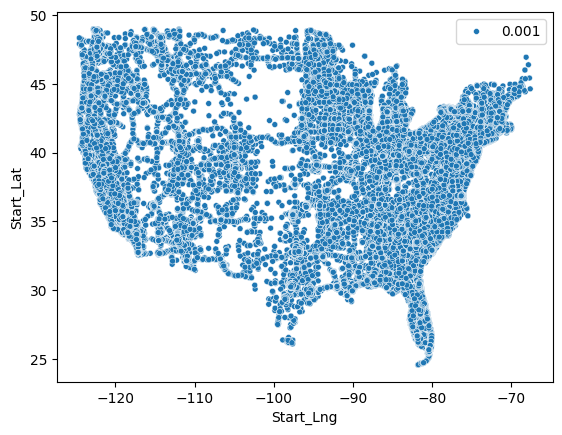

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)



## Some more question & answer

1. Are there more accidents in warmer or colder areas?
   * Ans : colder
2. Which 5 states have the highest number of accidents?
   
  * Ans: Miami,LosAngeles,Dallas,Charlotte,Houston
3. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
 * Ans : CA
5. What time of the day are accidents most frequent in?
  * Ans: In morning and Evening
6. Which days of the week have the most accidents?
  * Ans : Its from Monday to Friday
7. Which month have the most accidents?
 * Ans : December
8. What is the trend of accidents year over year (decreasing/increasing?)
  * Ans : It starts by decreases slightly but increases at the end
9. When is accidents per unit of traffic the highest.
  * Ans : At 2Am
